# Классификация с помощью kNN. Кластеризация K-means

In [149]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [150]:
X, y = load_iris(return_X_y=True)
print(X.shape)
X = X[:, :2]

(150, 4)


In [151]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

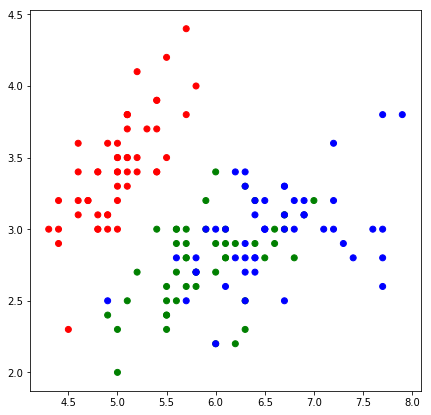

In [152]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [153]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [154]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [155]:
def accuracy(pred, y):
    return (sum(pred==y)/len(y))

In [156]:
k=1

y_pred = knn(X_train, y_train, X_train, k)
print(f'Точность на train knn при k = {k}: {round(accuracy(y_pred, y_train), 3)}')

Точность на train knn при k = 1: 0.942


In [157]:
k=1

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность knn при k = {k}: {round(accuracy(y_pred, y_test), 3)}')

Точность knn при k = 1: 0.667


In [158]:
def get_graph(X_train, y_train, k):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = 0.02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

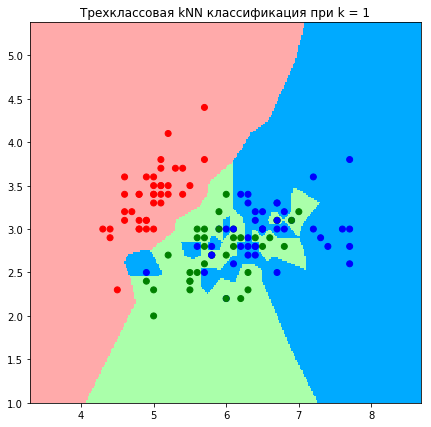

In [159]:
get_graph(X_train, y_train, k)

In [160]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность knn при k = {k}: {round(accuracy(y_pred, y_test), 3)}')

Точность knn при k = 3: 0.733


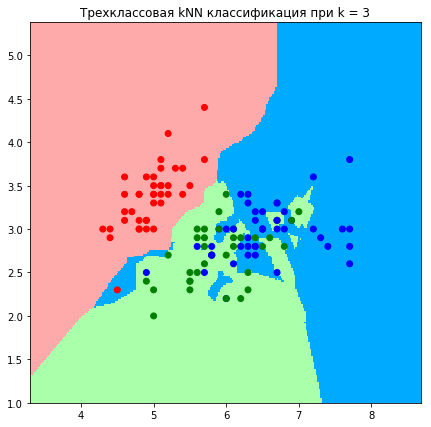

In [161]:
get_graph(X_train, y_train, k)

In [ ]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность knn при k = {k}: {round(accuracy(y_pred, y_test), 3)}')

In [ ]:
get_graph(X_train, y_train, k)

In [ ]:
k = 7

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность knn при k = {k}: {round(accuracy(y_pred, y_test), 3)}')

In [ ]:
get_graph(X_train, y_train, k)

In [ ]:
k = 9

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность knn при k = {k}: {round(accuracy(y_pred, y_test), 3)}')

In [ ]:
get_graph(X_train, y_train, k)

## Обучение без учителя. Кластеризация. K-means

In [ ]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

In [192]:
def kmeans(data, k, max_iterations, min_distance):
    
    classes = {i: [] for i in range(k)}
    
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
            
        old_centroids = centroids.copy()
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(np.abs((centroids[centroid] - old_centroids[centroid])/old_centroids * 100)) > min_distance:
                optimal = False
        
        if optimal:
            break
            
    return old_centroids, classes

In [193]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

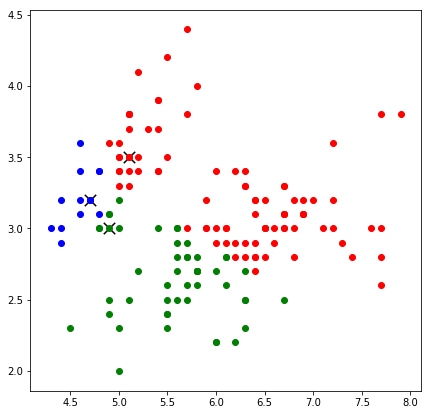

In [194]:
max_iterations = 1
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [ ]:
max_iterations = 3
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [ ]:
max_iterations = 10
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [ ]:
max_iterations = 50
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

## Домашнее задание

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.
2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.

In [188]:
def knn(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[:k]:
            classes[d[1]] += q**d[0]
            
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [191]:
k = 7

y_pred = knn(X_train, y_train, X_test, k, q = 0.5)
print(f'Точность knn при k = {k}: {round(accuracy(y_pred, y_test), 3)}')

Точность knn при k = 7: 0.8


### 2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [205]:
def e_metrics(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

In [264]:
def get_msid_per_cluster(cluster, centroid):
    result = 0
    for el in cluster:
        result += np.square(e_metrics(el, centroid))
    return result / len(cluster)

In [311]:
def get_msid(clusters, centroids):
    result = 0
    for cluster in clusters:
        result += get_msid_per_cluster(clusters[cluster], centroids[cluster])
    return result

In [312]:
K = np.arange(1, 10)

In [313]:
msid = []

for k in K:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    msid.append(get_msid(clusters, centroids))

In [314]:
msid

[0.8698351111111119,
 0.9055629962924323,
 0.8908065495449278,
 0.9201422396019159,
 0.9296444885446136,
 1.0197706775194182,
 1.0250334025193848,
 1.0085548409727256,
 0.9354321676553117]

No handles with labels found to put in legend.


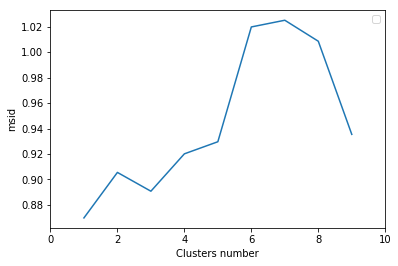

In [315]:
plt.xlabel('Clusters number')
plt.ylabel('msid')
plt.xlim(0, 10)
plt.plot(K, msid)
plt.legend(loc='upper right')
plt.show()